In [28]:
import tensorflow as tf

# Loading - "MNIST Data Set"
## Containing Training samples = 60.000. Testing Sample = 10.000
### TensorFlow already contain MNIST data set which can be loaded using Keras

In [29]:
# tf.keras.datasets.mnist, nó sẽ trả về hai bộ dữ liệu: một bộ dữ liệu huấn luyện và một bộ dữ liệu kiểm tra, mỗi bộ dữ liệu bao gồm các hình ảnh của các chữ số và nhãn tương ứng với chúng (chữ số nào từ 0 đến 9)
mist = tf.keras.datasets.mnist

## After loading the MNIST data, Divide into train and Test Datasets

In [30]:
(x_train, y_train), (x_test, y_test) = mist.load_data()

In [31]:
x_train.shape

(60000, 28, 28)

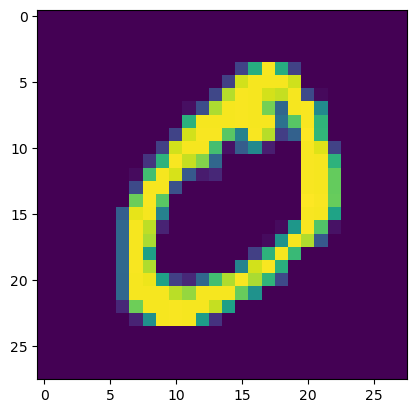

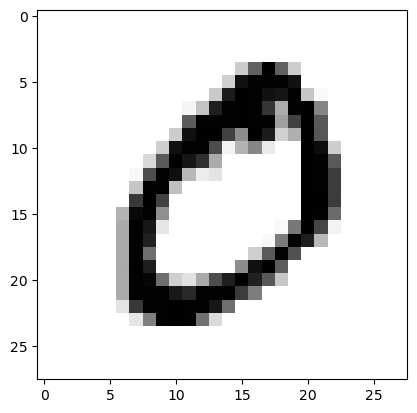

In [32]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.show()

plt.imshow(x_train[1], cmap=plt.cm.binary)

### Chekinh the values of each pixel
### Before Normalization

In [33]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#### As images are Gray level (1 channed ==> 0 to 255), not Colored (RGB)
### Normolize the data | Pre-Processing Step

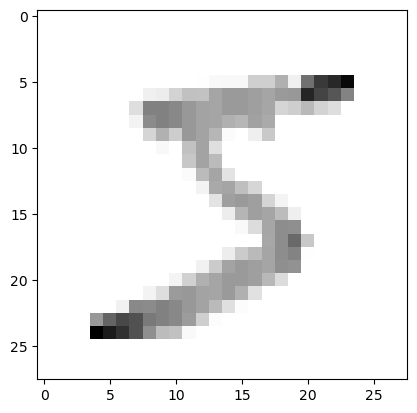

In [34]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap= plt.cm.binary)

## After Normalization

In [35]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [36]:
print(y_train[0])

5


## Resizing images to make it suitable for apply Convolution operation

In [37]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples dimension", x_train.shape)
print("Testing Samples dimension", x_test.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Nueral Network
#### Training on 60.000 samples of MNIST handwritten dataset

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [39]:
### Creating a neural network now
model = Sequential()


### First Conolution Layer 0 1 2 3 (60000, 28, 28, 1)      28-3+1 = 26*26
# only for first convalutuon layer to mention input layer size
model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:]))
# Activation function to make it non-linear, <0, remove, >0
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))


### 2nd Convolution Layer       26-3+1 = 24 * 24
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))

### 3nd Convolution Layer   
model.add(Conv2D(64, (3,3)))       # 24*24
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully Connected Layer # 1    20*20 = 400
# model.add(Flatten()) chuyển đổi các feature maps 2D từ lớp convolutional trước thành một vector 1D
model.add(Flatten())
# model.add(Dense(64)) thêm một lớp fully connected với 64 đơn vị (hoặc neurons)
model.add(Dense(64))    # neural network
model.add(Activation("relu"))

### Fully Connected Layer # 2
model.add(Dense(32))    # neural network
model.add(Activation("relu"))


### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10))    # neural network
# Hàm softmax thường được sử dụng để chuyển đổi đầu ra của mạng thành một phân phối xác suất trên các lớp đích.
model.add(Activation("softmax"))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [41]:
print("Total Training Samples = ", len(x_train))

Total Training Samples =  60000


In [42]:
"""
loss="sparse_categorical_crossentropy": This parameter sets the loss function that the model will use to measure its performance during training. In this case, it's using "sparse_categorical_crossentropy," which is commonly used for multi-class classification problems where the labels are integers. For instance, if your classes are labeled as integers (0, 1, 2, etc.) and not one-hot encoded, this loss function is suitable.
optimizer="adam": This parameter sets the optimization algorithm used to update the weights of the neural network during training. "Adam" is a popular optimization algorithm that adapts the learning rate during training to improve convergence.
metrics=['accuracy']: This parameter specifies the evaluation metric(s) to be used during the training phase. Here, it's using 'accuracy' as a metric, which measures the accuracy of the model's predictions compared to the true labels.
"""
model.compile(loss= "sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [43]:
"""
epochs=5: The epochs parameter specifies the number of times the model will iterate over the entire training dataset during the training process. In this case, it's set to 5, meaning the model will go through the entire x_train and y_train dataset five times during the training.
"""
model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 18s 13ms/step - loss: 0.3316 - accuracy: 0.8969 - val_loss: 0.1368 - val_accuracy: 0.9597
Epoch 2/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.1019 - accuracy: 0.9685 - val_loss: 0.0779 - val_accuracy: 0.9766
Epoch 3/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0776 - val_accuracy: 0.9771
Epoch 4/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0662 - val_accuracy: 0.9806
Epoch 5/5
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0617 - val_accuracy: 0.9809


In [44]:
### Evaluateting on testing data set MNIST
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9835
Test Loss on 10,000 test samples 0.05831523984670639
Validation Accuracy on 10,000 test samples 0.9835000038146973


In [45]:
predictions = model.predict([x_test])

313/313 [==============================] - 1s 4ms/step


In [46]:
print(predictions)

[[3.3261057e-07 1.6620643e-05 2.1646467e-06 ... 9.9997771e-01
  5.9815257e-08 2.1432918e-06]
 [1.3457562e-05 2.7699414e-06 9.9998069e-01 ... 1.8329035e-06
  9.1739133e-07 1.5021861e-07]
 [8.7764086e-08 9.9999785e-01 7.7686803e-07 ... 3.3204711e-07
  5.8990608e-08 6.6259642e-09]
 ...
 [5.1637977e-07 1.8246465e-07 3.4041500e-10 ... 2.6869142e-08
  1.4006679e-06 1.0223481e-04]
 [1.0654405e-06 8.2485450e-09 3.2912233e-09 ... 6.7093073e-09
  2.7609676e-05 2.3805421e-06]
 [1.6173164e-04 5.6183788e-05 7.6182856e-05 ... 4.2533159e-07
  5.5101959e-06 8.4420964e-05]]


In [47]:
print(np.argmax(predictions[0]))

7


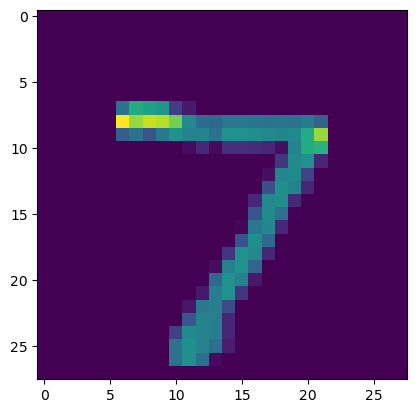

In [48]:
plt.imshow(x_test[0])

In [49]:
print(np.argmax(predictions[128]))

8


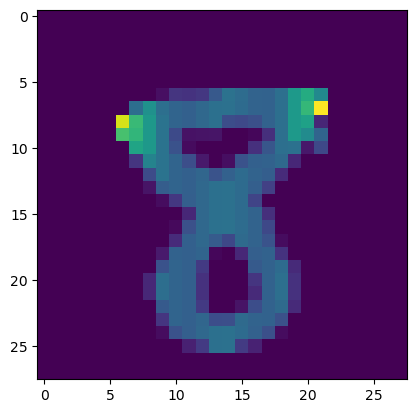

In [50]:
plt.imshow(x_test[128])

In [51]:
import cv2

In [52]:
img = cv2.imread('test.png')

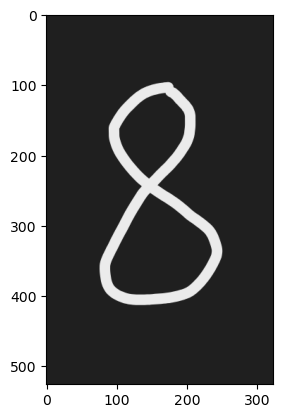

In [53]:
plt.imshow(img)

In [54]:
img.shape

(526, 322, 3)

In [55]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [56]:
gray.shape

(526, 322)

In [57]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [58]:
resized.shape

(28, 28)

In [59]:
newimg = tf.keras.utils.normalize(resized, axis= 1) ## 0 to 1 scaling

In [60]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE,IMG_SIZE, 1)

In [61]:
newimg.shape

(1, 28, 28, 1)

In [62]:
predicions = model.predict(newimg)

1/1 [==============================] - 0s 122ms/step


In [63]:
print(np.argmax(predicions))

8


In [64]:
def test_video():
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN

    cap = cv2.VideoCapture("video.mp4")
    if not cap.isOpened():
        cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise IOError("Cannot open video")

    text = "Some text in a box!"

    """
    cv2.getTextSize: Đây là một hàm trong OpenCV được sử dụng để lấy kích thước của văn bản trên hình ảnh.
    text: Đây là đoạn văn bản cần đo kích thước.
    font: Là kiểu font được sử dụng cho văn bản.
    fontScale: Là tỉ lệ để thay đổi kích thước của font (mặc định được đặt bằng font_scale).
    thickness: Độ dày của đường viền văn bản (mặc định là 1).
    """

    (text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness=1)[0]

    text_offset_x = 10
    text_offset_y = img.shape[0] - 25

    box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

    cntr = 0
    while True:
        ret, frame = cap.read()
        cntr = cntr+1
        if cntr % 2 == 0:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
            newimg = tf.keras.utils.normalize(resized, axis=1)
            newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
            predicions = model.predict(newimg)
            status = np.argmax(predicions)
            print(status)
            print(type(status))

            x1, y1, w1, h1 = 0, 0, 175, 75

            cv2.rectangle(frame, (x1,y1), (x1 + w1, y1 + h1), (0, 255, 0), -1)

            cv2.putText(frame, status.astype(str), (x1 + int(w1/5), y1 + int(h1/2)), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255))
            cv2.imshow("Handwritten Digits Recognition Tutorial", frame)

            # == ord('q'): Kiểm tra xem kết quả từ cv2.waitKey(2) có phải là ký tự 'q' hay không
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

In [65]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox
from PIL import Image, ImageTk

In [107]:
window = tk.Tk()
window.title("Project")
window.resizable(0,0)

canvas1 = Canvas(window, width=500, height=250, bg="ivory")
canvas1.place(x = 5, y = 120)

def prediction():
    import joblib
    import cv2
    import numpy as np
    import time
    import pyscreenshot as ImageGrab
    img = ImageGrab.grab(bbox=(180, 550, 550, 750))
    img.save("paint.png")
    im = cv2.imread("paint.png")
    load = Image.open("paint.png")
    load = load.resize((280,280))
    photo = ImageTk.PhotoImage(load)

    # Lables can be text or images
    img = Label(canvas3, image=photo, width=280, height=280)
    img.image=photo
    img.place(x=0,y=0)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)
    newimg = tf.keras.utils.normalize(resized, axis=1)
    newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    predicions = model.predict(newimg)
    status = np.argmax(predicions)

    predictions = status.astype(str)

    a1 = tk.Label(canvas3, text="Prediction= ", font=("Algerian",20))   
    a1.place(x= 5, y= 350)

    b1 = tk.Label(canvas3, text=predictions[0], font=("Algerian",20))
    b1.place(x= 200, y= 350)

b4 = tk.Button(canvas1, text="4. Live prediction", font=('Algerian', 15), bg="white", fg="red", command= prediction)
b4.place(x=5, y=200)


canvas2 = Canvas(window, width=250, height=200, bg="black")
canvas2.place(x = 130, y = 380)

def activate_paint(e):
    global lastx, lasty
    canvas2.bind('<B1-Motion>', paint)
    lastx, lasty = e.x, e.y

def paint(e):
    global lastx, lasty
    x,y  = e.x, e.y
    canvas2.create_line((lastx, lasty,x,y), width= 10, fill="white")
    lastx, lasty = x,y

# canvas2.bind() được sử dụng để bắt các sự kiện như click chuột, di chuột, nhấn phím, và nhiều sự kiện khác liên quan đến canvas.
canvas2.bind("<1>", activate_paint)

def clear():
    canvas2.delete("all")

btn = tk.Button(canvas2, text = "clear", fg="white",bg="green" , command = clear)
btn.place(x=0, y= 0)


canvas3 = Canvas(window, width=280, height=530, bg="green")
canvas3.place(x = 515, y = 120)

window.geometry("800x680")
window.mainloop()

1/1 [==============================] - 0s 20ms/step
0
1/1 [==============================] - 0s 15ms/step
0
1/1 [==============================] - 0s 17ms/step
6
1/1 [==============================] - 0s 13ms/step
1
1/1 [==============================] - 0s 22ms/step
1
